**Regresja wielowymiarowa metodą częściowych najmniejszych kwadratów (PLS)**

Potrzebne pliki:
USA_Housing.csv, juices.csv


**Przykład 1**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from scipy.stats import pearsonr

**Przewidywanie cen mieszkań/domów**

Agent nieruchomości potrzebuje pomocy w przewidywaniu cen mieszkań w regionach USA.
Trenujemy model, który pozwoli na podanie kilku cech domu i zwróci szacunkową cenę, za jaką dom mógłby zostać sprzedany.

Regresja wielowymiarowa może być dobrą metodą rozwiązania tego problemu!

Wczytanie danych


In [2]:
data = pd.read_csv('USA_Housing.csv', sep=',', header=0)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Przygotowanie danych

In [3]:
df = pd.DataFrame()
df['Income'] = data['Avg. Area Income'].round(2)
df['House Age'] = data['Avg. Area House Age'].round(2)
df['No. of Rooms'] = data['Avg. Area Number of Rooms'].apply(int)
df['No. of Bedrooms'] = data['Avg. Area Number of Bedrooms'].apply(int)
df['Population'] = data['Area Population'].apply(int)
df['Price/$'] = data['Price'].apply(int)

In [4]:
df.head()

,Income,House Age,No. of Rooms,No. of Bedrooms,Population,Price/$
0,79545.46,5.68,7,4,23086,1059033
1,79248.64,6.00,6,3,40173,1505890
2,61287.07,5.87,8,5,36882,1058987
3,63345.24,7.19,5,3,34310,1260616
4,59982.20,5.04,7,4,26354,630943


Ogólna infromacja o typach zmiennych i brakujących danych

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           5000 non-null   float64
 1   House Age        5000 non-null   float64
 2   No. of Rooms     5000 non-null   int64  
 3   No. of Bedrooms  5000 non-null   int64  
 4   Population       5000 non-null   int64  
 5   Price/$          5000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 234.5 KB


Statystyka opisowa zmiennych numeryczmnych

In [7]:
df.describe().T #transpozycja zeby zmiescic dane na ekranie

,count,mean,std,min,25%,50%,75%,max
Income,5000.0,6.858311e+04,10657.991228,17796.63,61480.565,68804.285,7.578334e+04,107701.75
House Age,5000.0,5.977278e+00,0.991437,2.64,5.320,5.970,6.650000e+00,9.52
No. of Rooms,5000.0,6.492200e+00,1.048503,3.00,6.000,7.000,7.000000e+00,10.00
No. of Bedrooms,5000.0,3.732400e+00,1.225843,2.00,3.000,4.000,4.000000e+00,6.00
Population,5000.0,3.616301e+04,9925.646640,172.00,29403.750,36199.000,4.286100e+04,69621.00
Price/$,5000.0,1.232072e+06,353117.621567,15938.00,997576.500,1232669.000,1.471210e+06,2469065.00


Wyświetlenie nazw kolumn

In [8]:
df.columns

Index(['Income', 'House Age', 'No. of Rooms', 'No. of Bedrooms', 'Population',
       'Price/$'],
      dtype='object')

Wykres macierzowy z uwzględnieniem zależności od ceny domu

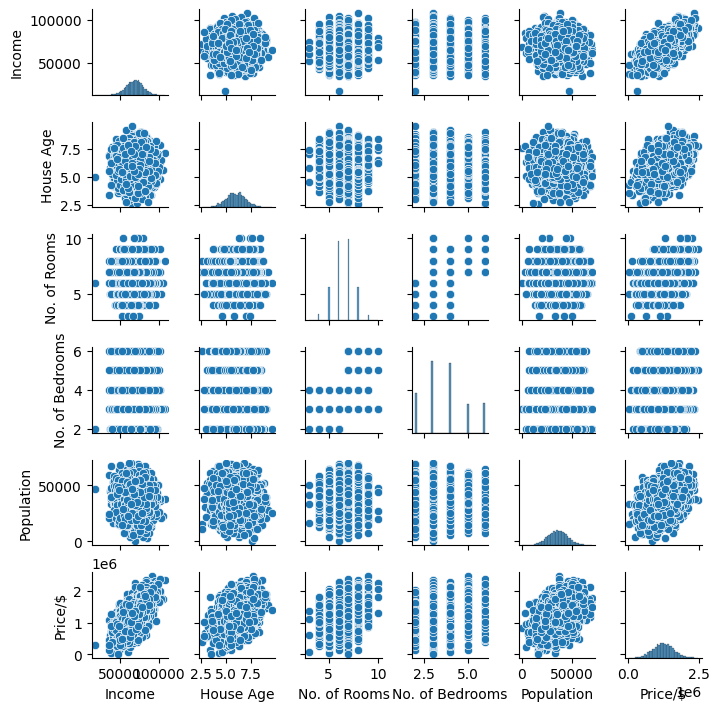

In [9]:
sns.pairplot(df, height=1.2)
plt.show()

Obliczenie i wyświetlenie macierzy korelacji w formie mapy cieplnej

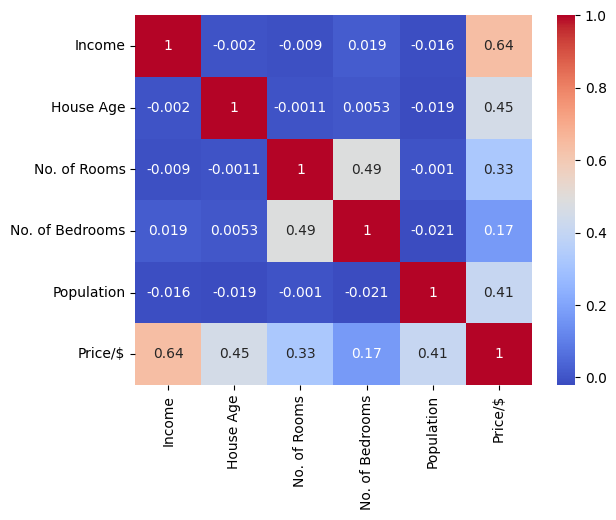

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Utworzenie macierzy X, y do dalszych obliczeń

In [14]:
X = df.values[:,:5]
y = df['Price/$'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Definicja i trenowanie modelu regresyjnego. Najprostszy, ale w wielu przypadkach wystarczający, przykład użycia.
Wybrano 3 zmienne ukryte LV (n_components=3). Tutaj może wybrać maksymalnie 5, bo tyle jest dostępnych zmiennych objaśniających.

Liczba LV podlega optymalizacji, co będzie pokazane dalej.

Zastosowano skalowanie zmiennych.

In [23]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

,n_components,2
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


Ocena modelu na zbiorze treningowym

RMSEC - pierwistek błędu średniokwadratowego dla zbioru uczącego (wyrażony w takiej jednostce, jak zmienna y)

MSE (mean_squred_error) - błąd średniokwadratowy

Istotny wykres umożliwiający szybką, wizualną ocenę każdego modelu regresyjnego na podstawie zależności "predicted" od "actual". Na osi X zaznaczono znane wartości zmiennej zależnej, a na osi Y - obliczone na podstwie modelu regresyjnego. Oczekujemy, że obiekty będą miały te dwie współrzędne zgodne, czyli będą grupować się wokół prostej y=x. Ocena zgodności została zaprezentowana poprzez R².


TRAINING SET
RMSEC/$: 108338.58183214745
R² train: 0.906


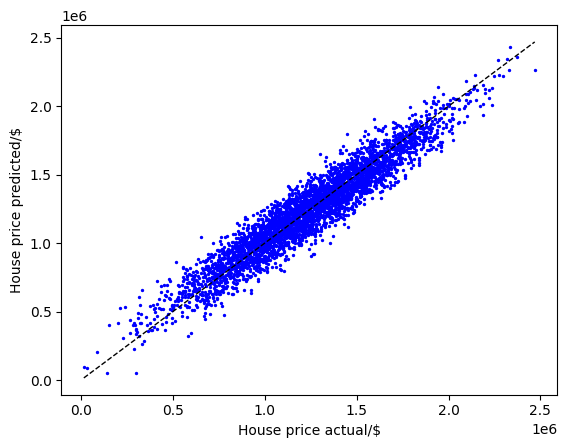

In [24]:
print('TRAINING SET')
y_train_pred= pls.predict(X_train)
print('RMSEC/$:', root_mean_squared_error(y_train,y_train_pred))
corr,_ = pearsonr(y_train,y_train_pred)
print(f'R² train: {corr**2:.3f}') # to samo ale zastosowano indeks górny

fig, ax = plt.subplots()
# rysowanie punktów (obiektów)
ax.scatter(y_train, y_train_pred, s=2, color='b')
# rysowanie linii prostej y=x
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)
ax.set_xlabel('House price actual/$')
ax.set_ylabel('House price predicted/$')
plt.show()

Ocena modelu na zbiorze testowym. Prezentacja i analiza wyników jak dla zbioru treningowego.
Czy występuje przeuczenie modelu?

TEST SET
RMSEP/$: 108907.46782362639
R² test: 0.904


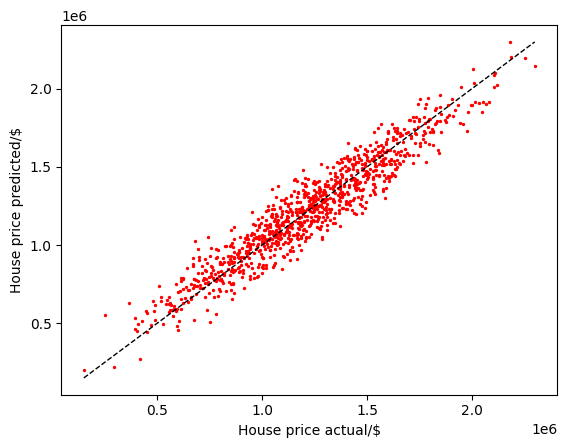

In [25]:
print('TEST SET')
y_test_pred= pls.predict(X_test)
print('RMSEP/$:', root_mean_squared_error(y_test,y_test_pred))
corr,_ = pearsonr(y_test,y_test_pred)
print(f'R² test: {corr**2:.3f}')
fig, ax = plt.subplots()
# rysowanie punktów (obiektów)
ax.scatter(y_test, y_test_pred, s=2, color='r')
# rysowanie linii prostej y=x
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('House price actual/$')
ax.set_ylabel('House price predicted/$')
plt.show()

Średni błąd bezwzględny dla zbioru testowego (MAE)

In [26]:
from sklearn.metrics import mean_absolute_error #MAE
print(f'MAE (test)/$: {mean_absolute_error(y_test, y_test_pred):.3f}')

MAE (test)/$: 87766.018


Optymalizacja liczby LV w procedurze walidacji krzyżowej z podziałem na 10 podzbiorów (k=10). W efekcie otrzymujemy wykres - na osi X liczba zmiennych ukrytych, na osi Y - parametr MSECV. Można też obliczyć RMSECV, wtedy prezentacja będzie zgodna z wcześniejszymi wykresami.

Poszukujemy minimum na tym wykresie. Tutaj wynosi 3 lub 4. To optymalna liczba LV.

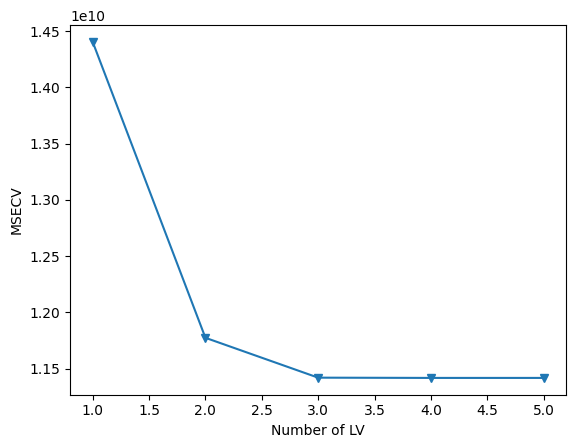

In [27]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import model_selection

# 10-fold CV, with shuffle
# 10-cio krotna walidacja krzyżowa 
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# wektor z wartosciami bledu (zanegowane bo maksymalizujemy score)
msecv = []

for i in np.arange(1, 6): # maksymalnie LV=5, bo tyle jest zmiennych objaśniających
    pls = PLSRegression(n_components=i)
    # proszę zwrócić uwagę na konwecję obliczania "scoring"
    score = model_selection.cross_val_score(pls, X_train, y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    msecv.append(-score)

plt.plot(np.arange(1, 6), np.array(msecv), '-v')
plt.xlabel('Number of LV')
plt.ylabel('MSECV')
plt.show()

**Przykład 2**

Modelowano dodatek syropu glukozowo-fruktozowego do soku jabłkowego.
Wielkości dodatków: 0%, 10%, 20%, 30%, 40%, 50%.

Zdefiniować model regresyjny dedykowany do modelowania wielkości dodatku syropu glukozowo-fruktozowego (SGF).

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import scipy.io as spio

Wczytanie pliku zapisanego w fromacie *.mat (Matlab)

In [29]:
mat = spio.loadmat('juices.mat', squeeze_me=True)
X = mat['X']
y = mat['y']

Obliczenie rozmiaru X

In [30]:
X.shape

(510, 360)

Obliczenie rozmiaru y

In [31]:
y.shape

(510,)

Wyświetlenie wykresów zapisanych w macierzy X.

Uwaga! Na potrzeby tego rysunku wykonać transpozycję macierzy.

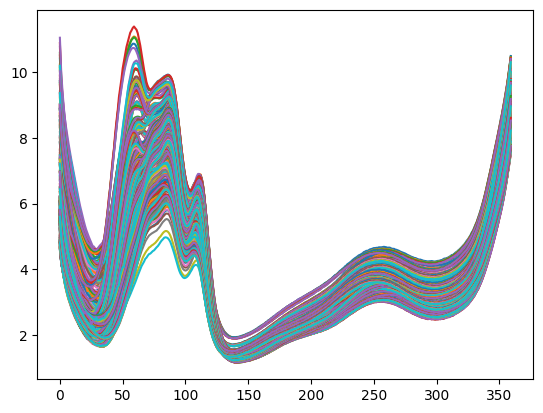

In [35]:
plt.plot(X.T)
plt.show()

Wyświetlenie zawartości y w formie wykresu

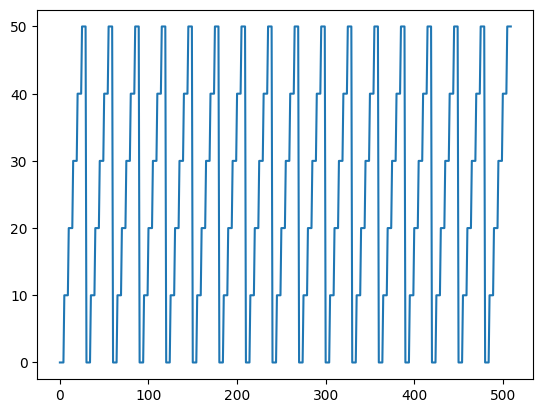

In [36]:
plt.plot(y)
plt.show()

Podział na zbiór treningowy i testowy

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Trening modelu (PLS) przy ustalonej pewnej początkowej wartości LV, która dalej zostanie zoptymalizowana

In [56]:
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

,n_components,20
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


Ocena modelu dla zbioru treningowego

Nazwa modelowanego parametru: **%GFS**


TRAINING SET
RMSEC/$: 3.443878961146921
R² train: 0.959


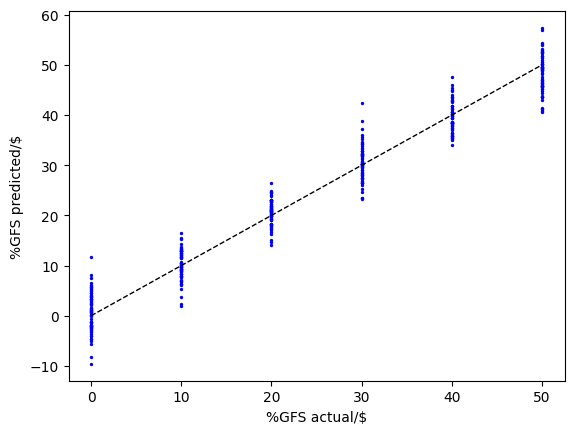

In [57]:
print('TRAINING SET')
y_train_pred= pls.predict(X_train)
print('RMSEC/$:', root_mean_squared_error(y_train,y_train_pred))
corr,_ = pearsonr(y_train,y_train_pred)
print(f'R² train: {corr**2:.3f}') # to samo ale zastosowano indeks górny

fig, ax = plt.subplots()
# rysowanie punktów (obiektów)
ax.scatter(y_train, y_train_pred, s=2, color='b')
# rysowanie linii prostej y=x
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=1)
ax.set_xlabel('%GFS actual/$')
ax.set_ylabel('%GFS predicted/$')
plt.show()

Ocena modelu dla zbioru testowego

TEST SET
RMSEP/$: 6.214352620365429
R² test: 0.872


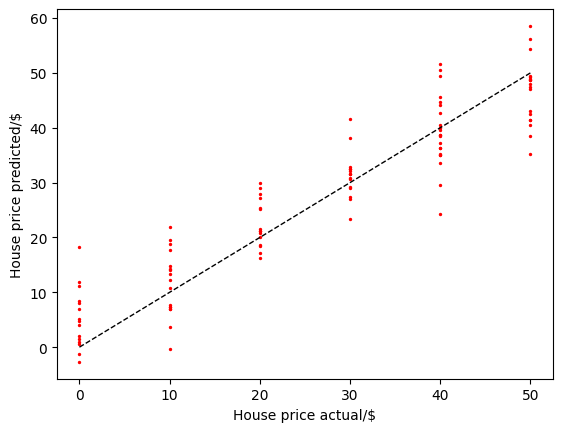

In [58]:
print('TEST SET')
y_test_pred= pls.predict(X_test)
print('RMSEP/$:', root_mean_squared_error(y_test,y_test_pred))
corr,_ = pearsonr(y_test,y_test_pred)
print(f'R² test: {corr**2:.3f}')
fig, ax = plt.subplots()
# rysowanie punktów (obiektów)
ax.scatter(y_test, y_test_pred, s=2, color='r')
# rysowanie linii prostej y=x
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('House price actual/$')
ax.set_ylabel('House price predicted/$')
plt.show()

Optymalizacja liczby LV

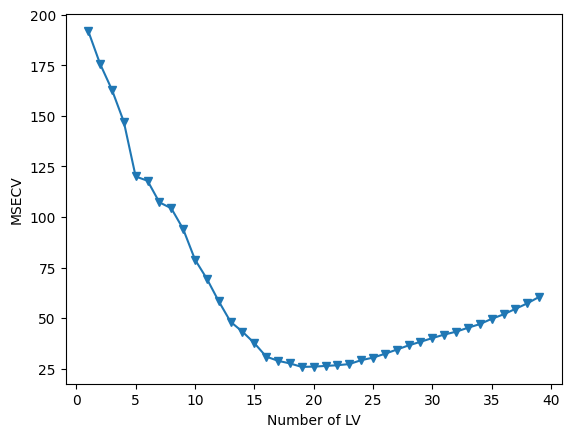

In [55]:
# 10-fold CV, with shuffle
# 10-cio krotna walidacja krzyżowa 
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# wektor z wartosciami bledu (zanegowane bo maksymalizujemy score)
msecv = []

for i in np.arange(1, 40): # maksymalnie LV=5, bo tyle jest zmiennych objaśniających
    pls = PLSRegression(n_components=i)
    # proszę zwrócić uwagę na konwecję obliczania "scoring"
    score = model_selection.cross_val_score(pls, X_train, y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    msecv.append(-score)

plt.plot(np.arange(1, 40), np.array(msecv), '-v')
plt.xlabel('Number of LV')
plt.ylabel('MSECV')
plt.show()